# Health Insurance Cross Sell Prediction 🏠 🏥

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

<center><img width="40%" src="https://img.freepik.com/free-vector/social-security-concept-illustration_114360-17279.jpg?t=st=1731539901~exp=1731543501~hmac=f2cec6918cf5f73b2fabc8333bffb8216ee41c5c08ac1326536af5fd3c35c89b&w=1380"></center>

**VARIABLES**

* `id`:   Unique ID for the customer
* `Gender`:   Gender of the customer
* `Age`:	Age of the customer
* `Driving_License`:	0 : Customer does not have DL, 1 : Customer already has DL
* `Region_Code`:	Unique code for the region of the customer
* `Previously_Insured`:	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
* `Vehicle_Age`:	Age of the Vehicle
* `Vehicle_Damage`:	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
* `Annual_Premium`:	The amount customer needs to pay as premium in the year
* `Policy_Sales_Channel`: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* `Vintage`:	Number of Days, Customer has been associated with the company
* `Response`:	1 : Customer is interested, 0 : Customer is not interested

ASSUMPTION : The response  = 0, means that the response was a negative and not a non response.


## 0.0 - Imports

### 0.1 - Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

### 0.2 - Helper Functions

In [2]:
def plot_percentage_by_category(df, category_col, target_col, figsize=(10, 6)):
    """
    Plots a bar plot showing the percentage of target = 1 by category, with bars representing 100% behind.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the data.
    category_col (str): Column name for the categories (y-axis).
    target_col (str): Column name for the target values (x-axis).
    """
    # Change the category_col to str
    df[category_col] = df[category_col].astype(str)


    # Calculate the percentage of target = 1 for each category
    percentages = df.groupby(category_col)[target_col].mean() * 100

    # Calculate total count and percentage for each category relative to entire dataset
    total_count = df.groupby(category_col)[target_col].count()
    total_percentage = (total_count / df.shape[0]) * 100

    # Sort categories by descending order of percentages
    percentages = percentages.sort_values(ascending=False)
    total_percentage = total_percentage.reindex(percentages.index)  # Reindex to match order

    # Plotting
    plt.figure(figsize=figsize)  # Adjust the figure size as needed

    # Using Seaborn style and color palette
    sns.set_style("white")  # Remove grid and use white background

    # Light blue color for 100% bars
    color_100 = 'lightblue'

    # Single shade of blue for percentage bars
    color_percentage = 'steelblue'

    # Convert index to string for proper plotting
    categories = percentages.index.astype(str)

    # Plotting 100% bars
    bars_100 = plt.barh(categories, [100] * len(percentages), color=color_100, edgecolor='black')

    # Adding quantities and percentages on top of 100% bars
    for i, bar in enumerate(bars_100):
        category = categories[i]
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                 f'{total_count[category]} ({total_percentage[category]:.2f}%)',
                 va='center', ha='left', fontsize=10)

    # Plotting percentage bars
    bars = plt.barh(categories, percentages, color=color_percentage, edgecolor='black')

    # Adding percentages values inside the bars
    for bar in bars:
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%',
                 va='center', ha='left', fontsize=10)

    # Removing spines (borders)
    sns.despine()

    # Adding labels and title
    plt.xlabel('Percentage (%)')
    plt.ylabel(category_col)
    plt.title(f'Percentage of {target_col} = 1 by {category_col}')

    # Show plot
    plt.show()


### 0.3 - Loading Data Set

In [3]:
df_raw = pd.read_csv('/Users/henriquekubo/Documents/repos/health/health_insurance/data/train.csv')
df1 = df_raw.copy()
df1.columns = df1.columns.str.lower()

In [4]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.0 - Data Description

### 1.1 - Data Dimension

In [5]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 381109
Number of columns: 12


### 1.2 - Data Types

In [6]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

### 1.3 - Check NA

In [7]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

### 1.4 - Data Descriptive

We will separate the dataset into categorical and numerical variables, and then check the statistical data in the numerical variables.

Separating a dataset into categorical and numerical variables is a crucial preprocessing step in machine learning for several reasons:

**1. Applying Appropriate Algorithms:** 

Different machine learning algorithms are designed to handle different data types.  Many algorithms, like linear regression or support vector machines, work best with numerical data.  Categorical data often needs to be transformed (e.g., one-hot encoding) before being used in these models. By separating the data types, you can apply the most effective algorithms for each.

**2. Feature Engineering:**

Separating the variables allows you to perform specific feature engineering techniques for each data type.  For numerical features, you might consider scaling, normalization, or creating new features based on mathematical relationships. For categorical features, you could explore techniques like one-hot encoding, label encoding, or frequency encoding to make them suitable for machine learning models.

**3. Improved Model Performance:**

Properly handling categorical and numerical variables can significantly improve the performance and accuracy of your machine learning models. By applying appropriate preprocessing techniques, you can help the model better understand the underlying patterns in the data and make more accurate predictions.

**4.  Data Understanding and Visualization:**

Analyzing numerical and categorical variables separately can provide valuable insights into the data. You can calculate descriptive statistics for numerical features (mean, median, standard deviation) and explore the distribution of categorical features (frequency counts, proportions). This helps in understanding the characteristics of the data and identifying potential issues like outliers or class imbalances.

**In summary:** Separating a dataset into categorical and numerical variables is essential for effective data preprocessing, feature engineering, and model selection, ultimately leading to improved model performance and better understanding of the data.


In [8]:
num_attributes = df1.select_dtypes(include= ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude= ['int64', 'float64', 'datetime64[ns]'])

In [9]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


## 2.0 - Feature Engineering

Feature engineering is essentially prepping your data for machine learning.  Think of it like this: you wouldn't feed a car raw crude oil, you'd refine it into gasoline first. Feature engineering does that for your data!

Here's why it's important:

* **Boosts accuracy:**  It helps your model find the important information and ignore the distractions.
* **Makes data usable:** It transforms data into the right format for your model to understand.
* **Helps your model learn better:**  It can simplify things and highlight the important patterns.


By doing good feature engineering, you help your machine learning model make better predictions and understand your data more effectively.


In [10]:
df2 =  df1.copy()

In [11]:
# vehicle age
df2['vehicle_age'] =  df2['vehicle_age'].apply( lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x == '1-2 Year' else 'below_1_year' ) 

# vehicle damage
df2['vehicle_damage'] =  df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

In [12]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,over_2_years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,between_1_2_year,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,over_2_years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,below_1_year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,below_1_year,0,27496.0,152.0,39,0


## 3.0 - Hypothesis

Hypotheses act as a roadmap for data analysis, providing:

* **Direction:** Focus your analysis on specific business questions.
* **Structure:** Organize your exploration and interpretation of data.
* **Validation:** Test your assumptions and ensure findings are relevant.
* **Communication:**  Clearly convey your results and justify conclusions.

Ultimately, hypotheses bring purpose and clarity to your data analysis, leading to more efficient, impactful insights that can be translated into valuable actions for the business team.
Here are some hypotheses to check it out:

* **H1** - Younger customers may be more likely to purchase car insurance due to a higher probability of buying their first car or being interested in newer models that require insurance.
* **H2** - Men may show greater interest in car insurance compared to women, possibly due to a cultural association with driving.
* **H3** -  Customers in urban areas or with higher population density may be more prone to purchasing car insurance due to the greater need for transportation and increased risk of accidents.
* **H4** - Customers who already have health insurance and also own a vehicle are more likely to purchase car insurance.
* **H5** - Long-time customers with a good payment history may be more likely to purchase another product from the insurer, such as car insurance.
* **H6** - Customers who purchased health insurance through a specific channel (online, phone, agent) may be more likely to purchase car insurance through the same channel.

## 4.0 - EDA

EDA is like getting to know your data before making any big decisions. It helps you find hidden patterns, spot errors, choose the right tools, and ultimately, make sure your analysis is on the right track. Think of it as the foundation for a strong and insightful data analysis!
I'll check my hypothesis here as well

In [13]:
df4 = df2.copy()

### 4.1 - Univariate Analysis

Univariate analysis is like taking a magnifying glass to each individual feature in your data. It's the simplest form of data analysis, where you focus on understanding one variable at a time

#### 4.1.1 - Testing Hypothesis

##### H1 - Younger customers may be more likely to purchase car insurance due to a higher probability of buying their first car or being interested in newer models that require insurance. (F)

We can see that younger people are not interested in car insurance, instead, midle age are more likely to hire the insurance

In [14]:
aux00 = df4.loc[df4['response'] == 0, 'age']
aux01 = df4.loc[df4['response'] == 1, 'age']


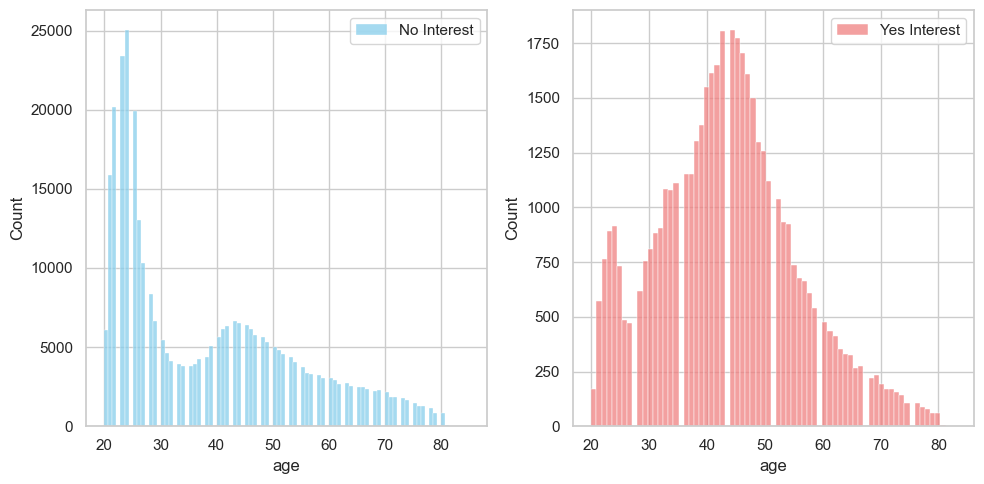

In [15]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(aux00, ax=axes[0], color='skyblue', label='No Interest')
sns.histplot(aux01, ax=axes[1], color='lightcoral', label='Yes Interest')

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

##### H2 - Men may show greater interest in car insurance compared to women, possibly due to a cultural association with driving. (T)

Apparently, men tend to purchase car insurance; among those who did, 61% were men.

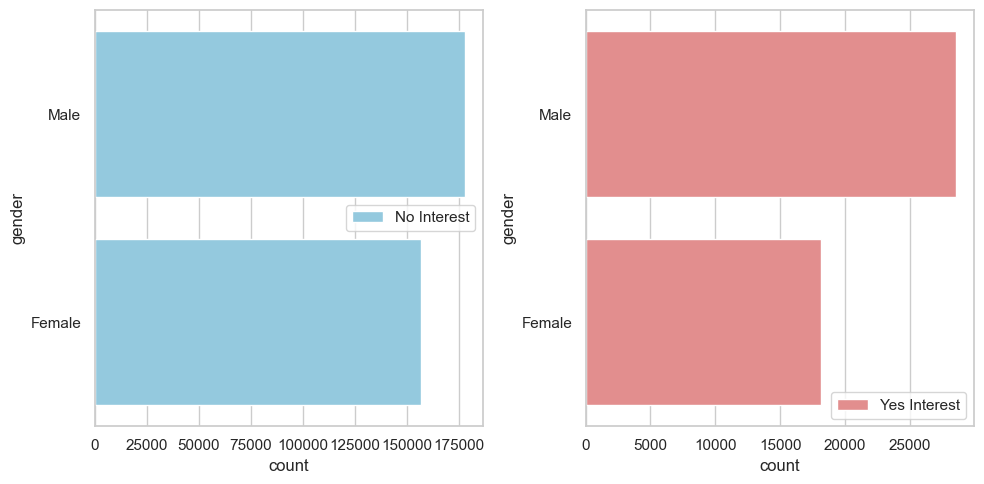

In [16]:
aux00 = df4.loc[df4['response'] == 0, 'gender']
aux01 = df4.loc[df4['response'] == 1, 'gender']

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(aux00, ax=axes[0], color='skyblue', label='No Interest')
sns.countplot(aux01, ax=axes[1], color='lightcoral', label='Yes Interest')

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

In [17]:
round(len(df4[(df4['response'] == 1) & (df4['gender'] == 'Male')]) / len(df4[df4['response'] == 1]) * 100,2)

61.07

In [18]:
round(len(df4[(df4['response'] == 1) & (df4['gender'] == 'Female')]) / len(df4[df4['response'] == 1]) * 100,2)

38.93

##### H3 -  Customers in urban areas or with higher population density may be more prone to purchasing car insurance due to the greater need for transportation and increased risk of accidents. ( - )

We can't know for sure if it's an urban, rural, or major city area. What we can do is see if the regions affect the decision to have or not have car insurance, and with this information, there's no much that we can analise, apparently, region 28 has a great number of insured, but, it can be an outlier.

<Axes: xlabel='region_code', ylabel='Count'>

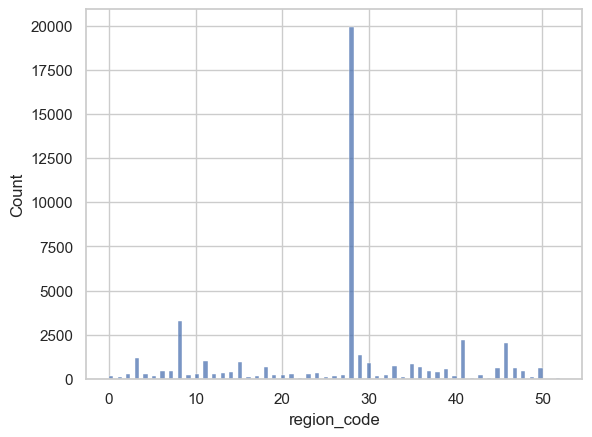

In [19]:
aux00 = df4[df4['response'] == 1]['region_code']
sns.histplot(aux00)

##### H4 - Customers who already have an car insurance  are more likely to decline this offer (T)

That's kind obvious, but it is best to make sure, as we can see, who has as insurance, has a NO responde in 99% of the time

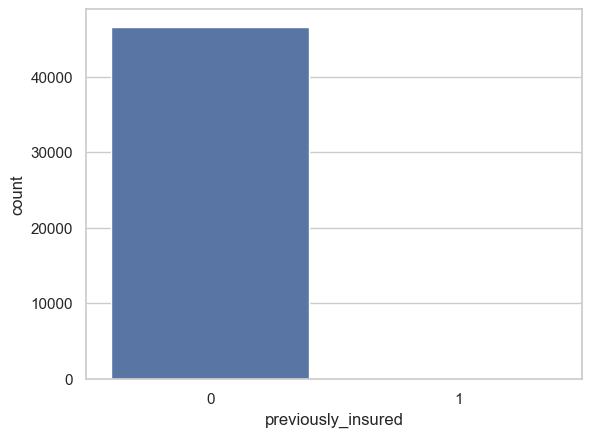

In [23]:
aux = df4.loc[df4['response'] == 1, 'previously_insured']

# Cria o countplot
sns.countplot(x=aux)

# Mostra o gráfico
plt.show()



##### H5 - If the vehicle has been damaged, then the vehicle insurance interest is greater. (T)

It seems that if a person has already had their vehicle in an accident, they are more likely to purchase car insurance. 


In [ ]:
aux00 = df4.loc[df4['response'] == 0, 'vehicle_damage']
aux01 = df4.loc[df4['response'] == 1, 'vehicle_damage']


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(aux00, ax=axes[0], color='skyblue', label='No Interest')
sns.countplot(aux01, ax=axes[1], color='lightcoral', label='Yes Interest')

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

##### H6 - Customers with older vehicle have less interest on vehicle insurance. (F)

Customers with older vehicle have more interest on vehicle insurance. This is curious too, people with less vehicle age tend to preserve their vehicles earlier, but that's not the case.

In [ ]:
aux00 = df4.loc[df4['response'] == 0, 'vehicle_age']
aux01 = df4.loc[df4['response'] == 1, 'vehicle_age']

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(aux00, ax=axes[0], color='skyblue', label='No Interest')
sns.countplot(aux01, ax=axes[1], color='lightcoral', label='Yes Interest')

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

## 5.0 - Feature Selection

## 6.0 - Data Preparation

## 7.0 - Machine Learning

Com base no conjunto de dados fornecido sobre a previsão de venda cruzada de seguros de saúde, podemos formular algumas hipóteses interessantes para investigar:

1. Demografia e interesse em seguro de veículos:

Idade: Clientes mais jovens podem estar mais propensos a adquirir seguro de veículos, devido a maior probabilidade de comprarem seus primeiros carros ou por se interessarem por modelos mais novos que exigem seguro.
Gênero: Homens podem demonstrar maior interesse em seguro de veículos em comparação com mulheres, devido a uma possível associação cultural com automobilismo.
Estado civil: Solteiros podem ter maior probabilidade de adquirir seguro de veículos, já que casados podem compartilhar veículos e apólices com o cônjuge.
Localização: Clientes em áreas urbanas ou com maior densidade populacional podem ser mais propensos a adquirir seguro de veículos, devido à maior necessidade de locomoção e maior risco de acidentes.

2. Comportamento de compra e interesse em seguro de veículos:

Posse de veículo: Clientes que já possuem um seguro de saúde e também possuem um veículo têm maior probabilidade de adquirir um seguro para o veículo.
Tempo como cliente: Clientes mais antigos e com bom histórico de pagamento podem estar mais propensos a adquirir outro produto da seguradora, como o seguro de veículos.
Canal de vendas: Clientes que adquiriram o seguro de saúde por meio de um canal específico (online, telefone, agente) podem ter maior probabilidade de adquirir o seguro de veículos pelo mesmo canal.

3. Fatores socioeconômicos e interesse em seguro de veículos:

Renda anual: Clientes com renda anual mais alta podem estar mais propensos a adquirir seguro de veículos, pois têm maior poder aquisitivo para comprar e manter um veículo.
Nível educacional: Clientes com maior nível educacional podem ter uma percepção diferente sobre a importância do seguro e ser mais propensos a adquiri-lo.
Histórico de acidentes: Clientes com histórico de acidentes podem estar mais conscientes dos riscos e ser mais propensos a adquirir um seguro de veículos.

4. Características do seguro de saúde e interesse em seguro de veículos:

Tipo de plano de saúde: Clientes com planos de saúde mais completos podem estar mais propensos a adquirir seguro de veículos, demonstrando uma tendência a se prevenir contra riscos.
Valor do prêmio do seguro de saúde: Clientes que pagam um valor mais alto pelo seguro de saúde podem ter maior probabilidade de adquirir seguro de veículos, indicando maior disponibilidade financeira.
Observações:

Essas são apenas hipóteses iniciais, e a análise dos dados pode revelar outras relações e insights relevantes.
É importante realizar uma análise exploratória dos dados para verificar a validade dessas hipóteses e identificar possíveis vieses.
As conclusões da análise devem ser cuidadosamente consideradas, levando em conta o contexto do problema e as limitações dos dados.
Com essas hipóteses, você pode iniciar sua análise e explorar os dados para identificar os fatores que influenciam a probabilidade de um cliente adquirir um seguro de veículos.
